In [69]:
import datetime
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import shap
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [70]:
train_SERS= pd.read_csv('SERS/SERS_train.csv')
test_SERS= pd.read_csv('SERS/SERS_test.csv')
train_SERS.head(20)

,edge_id,length,way_type,way_name,eta,timestamp,coverage,ata,latitude,longitude,is_tunnel,user_group,way_segments_count
0,165,36.713,7,توحیدی,13.007,1641423595457,1.114946,7.475,35.768834,51.469487,0.0,B,1
1,286,68.373,7,بوستان,9.116,1641188168444,0.998805,9.999,35.800156,51.474850,0.0,A,1
2,455,76.896,7,آذر,6.291,1642397104643,0.969756,7.004,32.645556,51.659348,0.0,A,3
3,455,76.896,7,آذر,6.291,1642248357955,0.883085,6.499,32.645556,51.659348,0.0,A,1
4,624,869.709,9,جاده شاهین شهر - میمه,38.182,1642592984805,0.969452,31.984,32.927357,51.517204,0.0,A,2
5,1933,609.710,6,شهدای اسلامی,49.885,1641822600562,0.991111,40.512,35.664616,51.293936,0.0,A,1
6,2114,1295.522,9,بلوار سردار سلیمانی,67.592,1641180015976,0.978334,65.994,32.807656,51.603057,0.0,B,1
7,2786,70.331,3,امام خمینی,10.549,1642097287913,0.949749,7.008,32.861088,51.545781,0.0,A,1
8,2786,70.331,3,امام خمینی,8.167,1642704886845,0.925996,7.998,32.861088,51.545781,0.0,B,2
9,2793,146.301,7,بیمارستان,13.167,1641751443297,0.906533,13.996,32.896970,51.534196,0.0,A,1


In [71]:
train_SERS.isnull().sum()

edge_id                 0
length                  0
way_type                0
way_name                0
eta                     0
timestamp               0
coverage                0
ata                     0
latitude              163
longitude             163
is_tunnel             163
user_group              0
way_segments_count      0
dtype: int64

In [72]:
test_SERS.isnull().sum()

edge_id               0
length                0
way_type              0
way_name              0
eta                   0
timestamp             0
coverage              0
latitude              0
longitude             0
is_tunnel             0
user_group            0
way_segments_count    0
dtype: int64

In [73]:
train_SERS = train_SERS.dropna(subset=['latitude','longitude','is_tunnel'])
train_SERS.isnull().sum()

edge_id               0
length                0
way_type              0
way_name              0
eta                   0
timestamp             0
coverage              0
ata                   0
latitude              0
longitude             0
is_tunnel             0
user_group            0
way_segments_count    0
dtype: int64

In [74]:
print('تعداد کل دیتا قبل از حذف تکراری ها',len(train_SERS))
train_SERS = train_SERS.drop_duplicates()
print('تعداد کل دیتا بعد از حذف تکراری ها',len(train_SERS))

تعداد کل دیتا قبل از حذف تکراری ها 161573
تعداد کل دیتا بعد از حذف تکراری ها 161568


In [75]:
train_SERS.describe()

,edge_id,length,way_type,eta,timestamp,coverage,ata,latitude,longitude,is_tunnel,way_segments_count
count,161568.000000,161568.000000,161568.000000,161568.000000,1.615680e+05,161568.000000,161568.000000,161568.000000,161568.000000,161568.000000,161568.000000
mean,57305.019478,200.860083,5.934832,18.164707,1.641937e+12,0.931025,18.144574,34.647492,51.617927,0.000192,1.908918
std,33601.005100,551.011207,2.094482,22.926311,5.342807e+08,0.173172,28.668589,2.370239,2.811621,0.013850,0.996362
min,0.000000,3.791000,0.000000,4.001000,1.640983e+12,0.800002,4.001000,25.283313,44.451325,0.000000,1.000000
25%,28299.000000,57.671750,3.000000,7.830000,1.641464e+12,0.884538,7.022000,32.720560,50.875666,0.000000,1.000000
50%,56686.500000,92.009000,7.000000,12.487000,1.641980e+12,0.931880,11.495000,35.680295,51.395546,0.000000,2.000000
75%,86387.250000,169.974000,7.000000,21.390250,1.642398e+12,0.966720,19.002000,35.831558,51.721575,0.000000,3.000000
max,116189.000000,27129.594000,10.000000,1059.104000,1.642797e+12,27.413967,987.526000,39.636717,62.341875,1.000000,4.000000


In [76]:
train_SERS['timestamp_converted'] = train_SERS['timestamp'].map(lambda x:datetime.datetime.fromtimestamp(x / 1000.0, tz=datetime.timezone.utc))
train_SERS['timestamp_converted'] = train_SERS['timestamp_converted'].apply(lambda x: x.replace(microsecond=0))
train_SERS['timestamp_converted'] = train_SERS['timestamp_converted'].astype(str).str.replace(r'\+00:00$', '', regex=True)
train_SERS['timestamp_converted'] = pd.to_datetime(train_SERS['timestamp_converted'])

test_SERS['timestamp_converted'] = test_SERS['timestamp'].map(lambda x:datetime.datetime.fromtimestamp(x / 1000.0, tz=datetime.timezone.utc))
test_SERS['timestamp_converted'] = test_SERS['timestamp_converted'].apply(lambda x: x.replace(microsecond=0))
test_SERS['timestamp_converted'] = test_SERS['timestamp_converted'].astype(str).str.replace(r'\+00:00$', '', regex=True)
test_SERS['timestamp_converted'] = pd.to_datetime(test_SERS['timestamp_converted'])

In [77]:
train_SERS.head()

,edge_id,length,way_type,way_name,eta,timestamp,coverage,ata,latitude,longitude,is_tunnel,user_group,way_segments_count,timestamp_converted
0,165,36.713,7,توحیدی,13.007,1641423595457,1.114946,7.475,35.768834,51.469487,0.0,B,1,2022-01-05 22:59:55
1,286,68.373,7,بوستان,9.116,1641188168444,0.998805,9.999,35.800156,51.474850,0.0,A,1,2022-01-03 05:36:08
2,455,76.896,7,آذر,6.291,1642397104643,0.969756,7.004,32.645556,51.659348,0.0,A,3,2022-01-17 05:25:04
3,455,76.896,7,آذر,6.291,1642248357955,0.883085,6.499,32.645556,51.659348,0.0,A,1,2022-01-15 12:05:57
4,624,869.709,9,جاده شاهین شهر - میمه,38.182,1642592984805,0.969452,31.984,32.927357,51.517204,0.0,A,2,2022-01-19 11:49:44


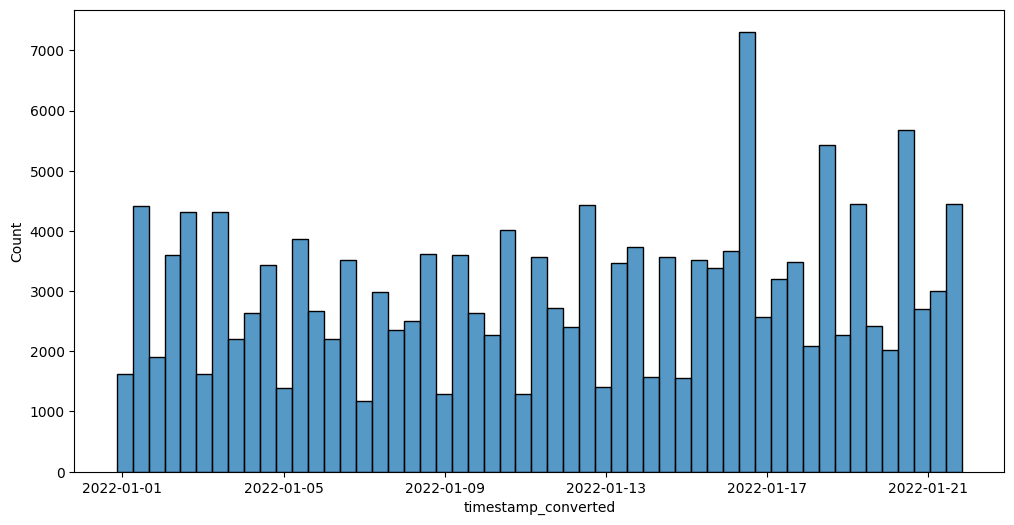

In [78]:
plt.figure(figsize=(12, 6))
sns.histplot(data=train_SERS, x="timestamp_converted")
plt.show()

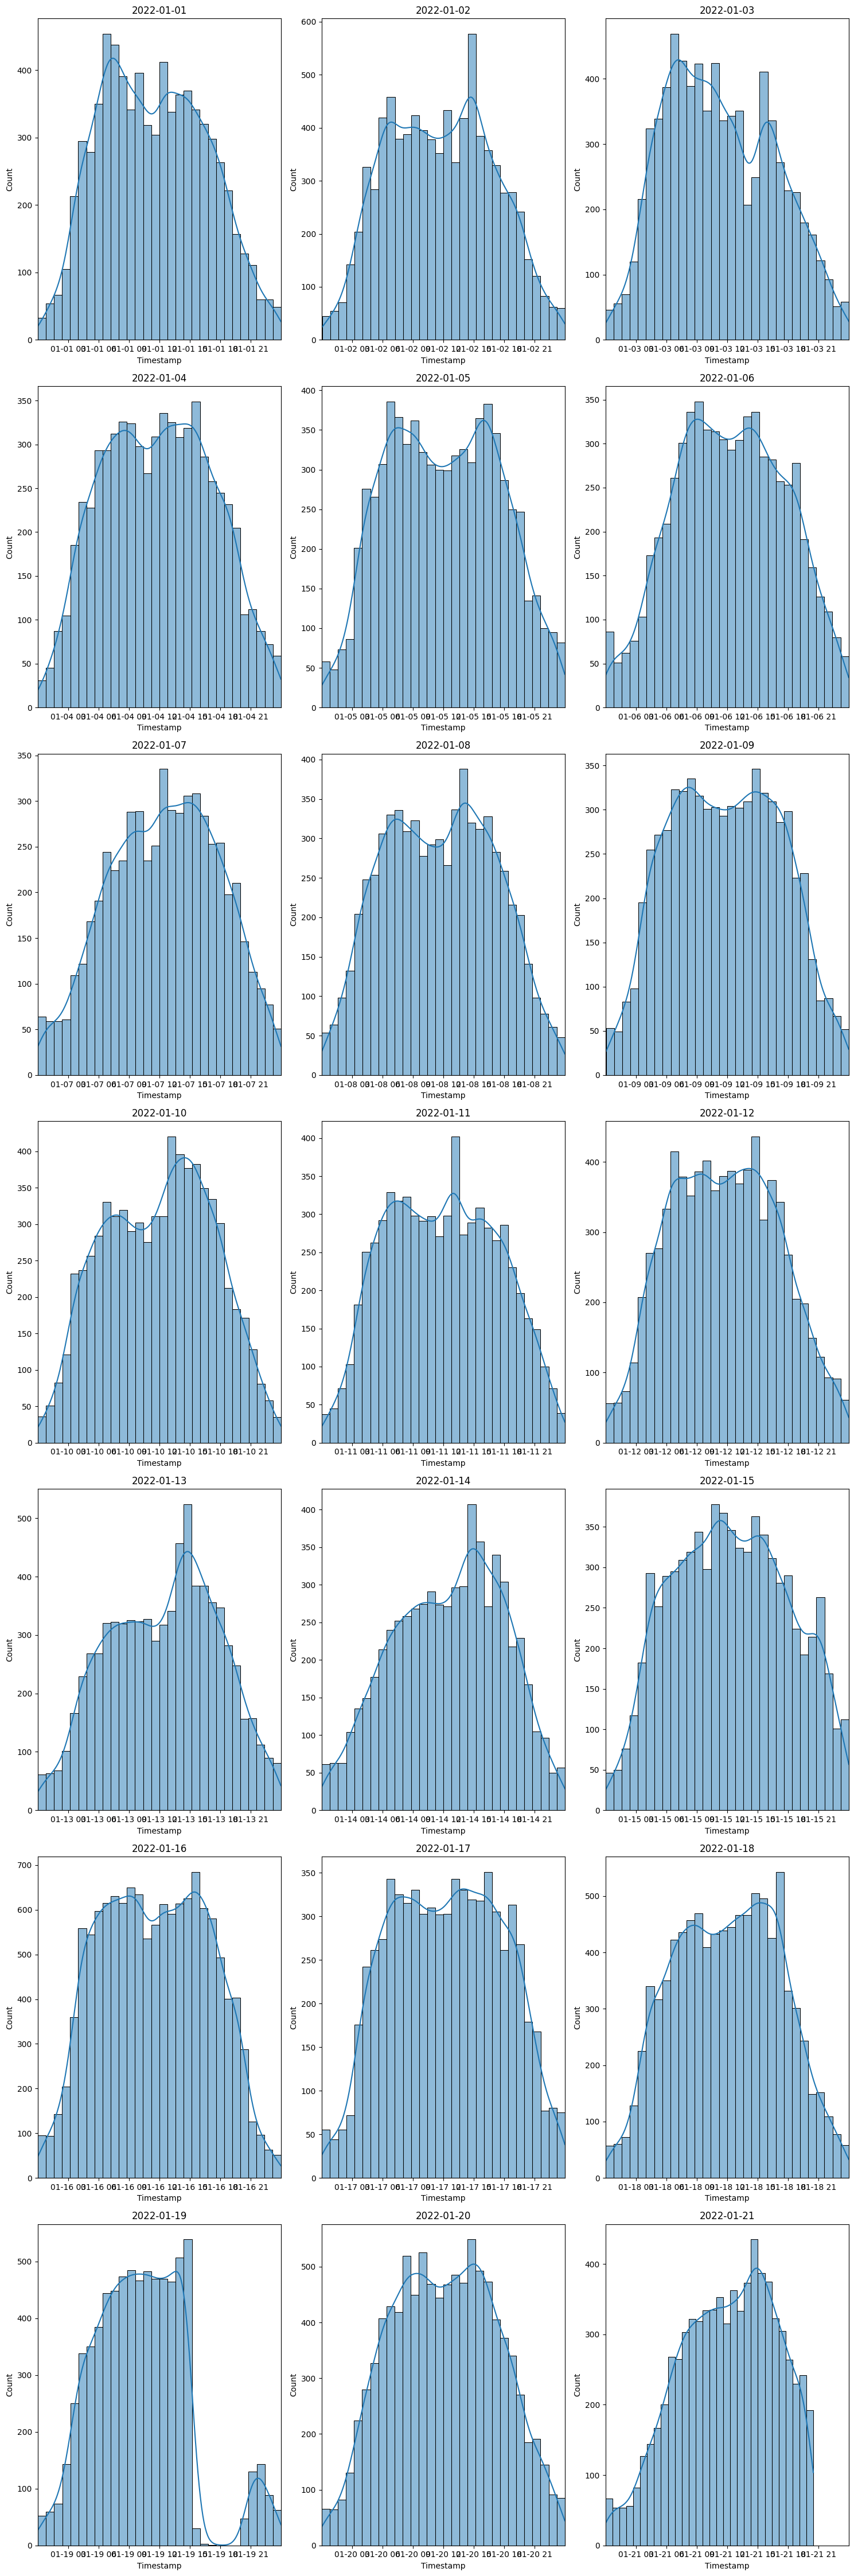

In [79]:
fig, axes = plt.subplots(7, 3, figsize=(15, 45), sharex=False)
axes = axes.flatten()

# رسم نمودار برای هر روز از 1 تا 21 ژانویه
for day in range(1, 22):
    day_str = f'2022-01-{day:02d}'
    ax = axes[day - 1]
    daily_data = train_SERS[train_SERS['timestamp_converted'].between(f'2022-01-{day:02d} 00:00:01', f'2022-01-{day:02d} 23:59:59')]
    sns.histplot(data=daily_data, x="timestamp_converted",bins=30, kde=True, ax=ax)
    ax.set_title(day_str)
    ax.set_xlabel('Timestamp')
    ax.set_ylabel('Count')
    ax.set_xlim([pd.Timestamp(f'2022-01-{day:02d} 00:00:01'), pd.Timestamp(f'2022-01-{day:02d} 23:59:59')])
    
plt.tight_layout()
plt.show()

In [80]:
train_SERS['day'] = train_SERS['timestamp_converted'].dt.day
train_SERS['hour'] = train_SERS['timestamp_converted'].dt.hour
train_SERS['minute'] = train_SERS['timestamp_converted'].dt.minute
train_SERS['day_of_week'] = train_SERS['timestamp_converted'].dt.dayofweek

test_SERS['day'] = test_SERS['timestamp_converted'].dt.day
test_SERS['hour'] = test_SERS['timestamp_converted'].dt.hour
test_SERS['minute'] = test_SERS['timestamp_converted'].dt.minute
test_SERS['day_of_week'] = test_SERS['timestamp_converted'].dt.dayofweek
train_SERS.head(10)

,edge_id,length,way_type,way_name,eta,timestamp,coverage,ata,latitude,longitude,is_tunnel,user_group,way_segments_count,timestamp_converted,day,hour,minute,day_of_week
0,165,36.713,7,توحیدی,13.007,1641423595457,1.114946,7.475,35.768834,51.469487,0.0,B,1,2022-01-05 22:59:55,5,22,59,2
1,286,68.373,7,بوستان,9.116,1641188168444,0.998805,9.999,35.800156,51.474850,0.0,A,1,2022-01-03 05:36:08,3,5,36,0
2,455,76.896,7,آذر,6.291,1642397104643,0.969756,7.004,32.645556,51.659348,0.0,A,3,2022-01-17 05:25:04,17,5,25,0
3,455,76.896,7,آذر,6.291,1642248357955,0.883085,6.499,32.645556,51.659348,0.0,A,1,2022-01-15 12:05:57,15,12,5,5
4,624,869.709,9,جاده شاهین شهر - میمه,38.182,1642592984805,0.969452,31.984,32.927357,51.517204,0.0,A,2,2022-01-19 11:49:44,19,11,49,2
5,1933,609.710,6,شهدای اسلامی,49.885,1641822600562,0.991111,40.512,35.664616,51.293936,0.0,A,1,2022-01-10 13:50:00,10,13,50,0
6,2114,1295.522,9,بلوار سردار سلیمانی,67.592,1641180015976,0.978334,65.994,32.807656,51.603057,0.0,B,1,2022-01-03 03:20:15,3,3,20,0
7,2786,70.331,3,امام خمینی,10.549,1642097287913,0.949749,7.008,32.861088,51.545781,0.0,A,1,2022-01-13 18:08:07,13,18,8,3
8,2786,70.331,3,امام خمینی,8.167,1642704886845,0.925996,7.998,32.861088,51.545781,0.0,B,2,2022-01-20 18:54:46,20,18,54,3
9,2793,146.301,7,بیمارستان,13.167,1641751443297,0.906533,13.996,32.896970,51.534196,0.0,A,1,2022-01-09 18:04:03,9,18,4,6


In [81]:
value_counts = train_SERS['is_tunnel'].value_counts()
print(value_counts)

is_tunnel
0.0    161537
1.0        31
Name: count, dtype: int64


In [82]:
value_counts = train_SERS['user_group'].value_counts()
print(value_counts)

user_group
A    121236
B     40332
Name: count, dtype: int64


In [83]:
value_counts = train_SERS['way_segments_count'].value_counts()
print(value_counts)

way_segments_count
1    73504
2    43997
3    29346
4    14721
Name: count, dtype: int64


In [84]:
print(train_SERS['coverage'].min(),train_SERS['coverage'].max())

0.8000019296451375 27.41396684616197


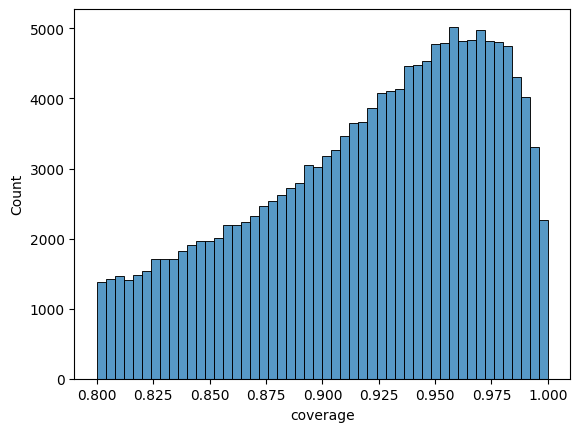

156025

In [85]:
sns.histplot(data=train_SERS[train_SERS['coverage'].between(0.7,1)], x="coverage",bins=50)
plt.show()
train_SERS = train_SERS[(train_SERS['coverage'] >= 0.7) & (train_SERS['coverage'] <= 1.0)]
len(train_SERS)

In [86]:
train_SERS['ata_True'] = train_SERS['ata']/train_SERS['coverage'] 
train_SERS['eta_True'] = train_SERS['eta']/train_SERS['coverage'] 

test_SERS['eta_True'] = test_SERS['eta']/test_SERS['coverage'] 

In [87]:
features=['length','way_type','latitude','longitude','day','hour','minute','day_of_week']
target='ata_True'
X = train_SERS[features]
y = train_SERS[target]

X_test = test_SERS[features]
y_test = test_SERS['eta_True']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)
y_eta_true = train_SERS.loc[X_val.index]['eta_True']
y_eta = train_SERS.loc[X_val.index]['eta']

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_val = sc.transform(X_val)
X_test = sc.transform(X_test)

ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=10, activation='relu', input_dim=X_train.shape[1]))
ann.add(tf.keras.layers.Dense(units=40, activation='relu'))
ann.add(tf.keras.layers.Dense(units=30, activation='relu'))
ann.add(tf.keras.layers.Dropout(0.2))
ann.add(tf.keras.layers.Dense(units=10, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1))
ann.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss=tf.keras.losses.MeanAbsolutePercentageError(), metrics=[tf.keras.metrics.MeanAbsolutePercentageError()])

history = ann.fit(X_train, y_train, batch_size = 300, epochs = 100)
loss, mape = ann.evaluate(X_val, y_val)
print(f'Mean Absolute Percentage Error on val set: {mape}')

Epoch 1/100
417/417 [==============================] - 1s 3ms/step - loss: 49.3124 - mean_absolute_percentage_error: 49.3124
Epoch 2/100
417/417 [==============================] - 1s 2ms/step - loss: 37.1888 - mean_absolute_percentage_error: 37.1888
Epoch 3/100
417/417 [==============================] - 1s 2ms/step - loss: 31.6265 - mean_absolute_percentage_error: 31.6265
Epoch 4/100
417/417 [==============================] - 1s 2ms/step - loss: 30.0536 - mean_absolute_percentage_error: 30.0536
Epoch 5/100
417/417 [==============================] - 1s 2ms/step - loss: 29.3186 - mean_absolute_percentage_error: 29.3186
Epoch 6/100
417/417 [==============================] - 1s 2ms/step - loss: 28.8193 - mean_absolute_percentage_error: 28.8193
Epoch 7/100
417/417 [==============================] - 1s 2ms/step - loss: 28.4896 - mean_absolute_percentage_error: 28.4896
Epoch 8/100
417/417 [==============================] - 1s 2ms/step - loss: 28.2444 - mean_absolute_percentage_error: 28.2444


ExactExplainer explainer: 31206it [04:04, 122.07it/s]                           


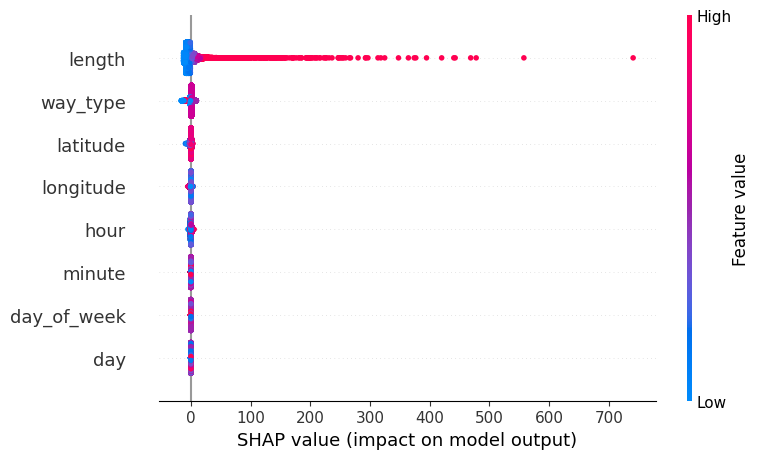

In [88]:
explainer = shap.Explainer(ann, X_train)
shap_values = explainer(X_val)
shap.summary_plot(shap_values, X_val, feature_names=features)

In [89]:
y_pred = ann.predict(X_val)

976/976 [==============================] - 1s 971us/step


In [90]:
y_pred = y_pred.flatten()
print(y_pred)

[ 6.6522036 11.493146  19.040195  ...  6.0033417  9.000686  13.42215  ]


In [91]:
y_val=np.array(y_val)
print(y_val)

[ 9.17947736 12.82938205 34.62001185 ...  5.21010486 23.95003374
 13.35666216]


In [92]:
epsilon = 1e-10
np.mean(np.abs((y_val - y_pred) / (y_val + epsilon))) * 100

27.858136794149946

In [93]:
np.mean(np.abs((y_val - y_eta_true) / (y_val + epsilon))) * 100

34.71387484834402

In [94]:
print(y_eta_true)

32783     11.842919
53093     12.014068
5944      50.701579
8460      11.016650
29420      5.367688
            ...    
33658      9.324282
116401     9.915252
104957     5.659898
50336     18.302861
66322     18.342826
Name: eta_True, Length: 31205, dtype: float64


In [95]:
y_test_pred = ann.predict(X_test)

2211/2211 [==============================] - 2s 780us/step


In [96]:
y_test_pred = y_test_pred.flatten()
print(y_test_pred)

[ 6.5609493  6.3966293  5.939802  ... 19.72885    8.2569475 10.513736 ]


In [97]:
y_test

0         8.664277
1        21.373116
2         7.324015
3        42.946351
4         6.725787
           ...    
70734    57.210069
70735    56.975073
70736    50.116992
70737    10.675444
70738    18.531381
Name: eta_True, Length: 70739, dtype: float64

In [98]:
np.mean(np.abs((y_test - y_test_pred) / (y_test + epsilon))) * 100

34.687093747059606